In [2]:
!pip install -r requirements.txt


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 42.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata

In [1]:
!git clone https://github.com/autodistill/autodistill-grounded-sam-2


Cloning into 'autodistill-grounded-sam-2'...
remote: Enumerating objects: 98, done.
remote: Counting objects: 100% (98/98), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 98 (delta 46), reused 68 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (98/98), 24.73 KiB | 3.09 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [2]:
import os

In [3]:
os.chdir('/content/autodistill-grounded-sam-2')

In [4]:
!pip install rf_groundingdino

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 16.2 MB/s eta 0:00:00


In [5]:
from autodistill_grounded_sam_2 import GroundedSAM2
from autodistill.detection import CaptionOntology
from autodistill.utils import plot

Flash Attention is disabled as it requires a GPU with Ampere (8.0) CUDA capability.


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import logging

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

def initialize_model(prompt):
    """
    Initialize the GroundedSAM2 model with the given prompt.

    Args:
        prompt (str): Prompt for the model.

    Returns:
        GroundedSAM2: Initialized model instance.
    """
    logging.info(f"Initializing GroundedSAM2 model with prompt: {prompt}")
    prompt_dict = {prompt: prompt}
    model = GroundedSAM2(
        ontology=CaptionOntology(prompt_dict)
    )
    logging.info("Model initialized successfully.")
    return model

def process_image(model, image_path):
    """
    Process an image file with the GroundedSAM2 model.

    Args:
        model (GroundedSAM2): Initialized model instance.
        image_path (str): Path to the image file.

    Returns:
        tuple: Original image, segmentation mask, and annotated image.
    """
    logging.info(f"Processing image: {image_path}")

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    results = model.predict(image_path)
    logging.info(f"Prediction results: {results}")

    # Create segmentation mask
    mask = np.zeros(image.shape[:2], dtype=np.uint8)
    if isinstance(results.mask, np.ndarray):
        mask = results.mask.squeeze().astype(np.uint8) * 255

    # Create annotated image
    annotated_image = plot(
        image=image_rgb,
        classes=model.ontology.classes(),
        detections=results,
        raw=True
    )

    return image_rgb, mask, annotated_image

def plot_results(image, mask, annotated_image):
    """
    Plot the original image, segmentation mask, and annotated image.

    Args:
        image (numpy.ndarray): Original image.
        mask (numpy.ndarray): Segmentation mask.
        annotated_image (numpy.ndarray): Annotated image.
    """
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(mask, cmap='gray')
    plt.title("Segmentation Mask")
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(annotated_image)
    plt.title("Annotated Image")
    plt.axis('off')

    plt.tight_layout()
    plt.show()

def main():
    # Initialize the model with the "racoon" prompt
    model = initialize_model("racoon")

    # Process a single image
    image_path = "/content/raccoon-25.jpg"
    image, mask, annotated_image = process_image(model, image_path)

    # Plot the results
    plot_results(image, mask, annotated_image)


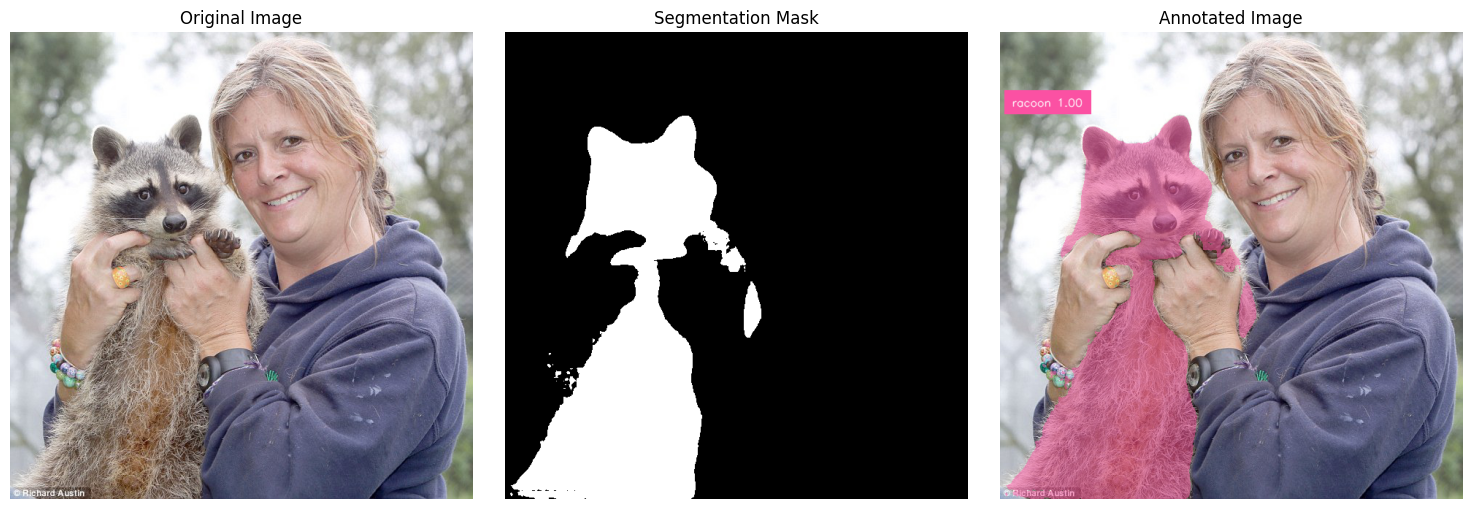

In [10]:
  logging.info("Starting the application")
  main()
  logging.info("Application completed")